# k-means clustering

In [2]:
import scipy as sp
from scipy import stats


In [3]:
a = sp.array([sp.nan, sp.nan]).mean()
sp.argmin([(1-a)**2, (1-a)**2])

/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/263016179.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  a = sp.array([sp.nan, sp.nan]).mean()
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/263016179.py:2: DeprecationWarning: scipy.argmin is deprecated and will be removed in SciPy 2.0.0, use numpy.argmin instead
  sp.argmin([(1-a)**2, (1-a)**2])


0

In [5]:
a = sp.array([3, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
a[sp.where([True, False, False, True, True, True, True, True, True, True, True, True])]

/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/1480779190.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  a = sp.array([3, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/1480779190.py:2: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  a[sp.where([True, False, False, True, True, True, True, True, True, True, True, True])]


array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [6]:


def k_means(data, cluster_n = 2, try_num = 1000):
    def calc_cluster_centroid(cluster_list, data_c):

        cluster_centroid = sp.empty((len(cluster_list), data_c.shape[1]-1))
        c_bool = []
        for c in cluster_list:  
            one_cluster_bool = (data_c[:,-1]==c)
            is_cluster = sp.any(one_cluster_bool)
            c_bool.append(is_cluster)
            if not is_cluster:
                continue
    
            idx = sp.where(cluster_list == c)
            cluster_centroid[idx] = sp.mean(data_c[one_cluster_bool, :-1], axis=0)

#         print("bool", c_bool)
#         print("centroid", cluster_centroid)
        return cluster_list[c_bool], cluster_centroid[c_bool]
    
    def rename_cluster(old_name, data_c, new_name):
        if sp.all(old_name==new_name):
            return data_c
        
        for idx in sp.arange(len(old_name)):
            data_c[data_c[:, -1]==old_name[idx], -1] = new_name[idx]
        return data_c
    
    cluster_list = sp.arange(0, cluster_n)
    data = sp.array(data)
    data_n = data.shape[0]

    c_l = None
    for i in sp.arange(try_num):
#         print("select random i:", i)
        random_cluster = sp.random.choice(cluster_list, data_n).reshape(data_n, 1)
     
        # check
        bool_arr = [sp.any(c==cluster_list) for c in random_cluster]
        if sp.all(bool_arr):
            c_l = random_cluster
            break
    if sp.any(c_l == None):
        print("can't select initial random cluster.")
        return 0

    data_c = sp.hstack((data, c_l))
    old_d = data_c
    for i in sp.arange(try_num):
        new_d = old_d.copy()
#         print("new_d[:,:-1]: ", new_d[:,:-1])
#         print("new_d[:,-1]==1: ", new_d[:,-1]==1)
        
        cluster_list, cluster_centroid = calc_cluster_centroid(cluster_list, new_d)
        
        for d in new_d:
#             print("d[:-1]:", d[:-1])
#             print("d[:-1]:-cen", d[:-1]-centroid)
            distance = sp.sum((d[:-1] - cluster_centroid)**2, axis=1)
#             print("distance:", distance)
            min_idx = sp.argmin(distance)
#             print("min_idx:",min_idx)
            d[-1] = cluster_list[min_idx]
#             print("uplabel d", new_d)
        
        if sp.all(new_d[:, -1]==old_d[:, -1]):
            return len(cluster_list), sp.arange(len(cluster_list)), rename_cluster(cluster_list, new_d, sp.arange(len(cluster_list)))
        
        old_d = new_d
    return len(cluster_list), sp.arange(len(cluster_list)), rename_cluster(cluster_list, new_d, sp.arange(len(cluster_list)))
        

d = stats.multivariate_normal(mean=(0,0), cov=[[1,0],[0,1]]).rvs(10)
# print("d:", d)
means = k_means(d)
print(len(means))
means

3


/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:29: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  cluster_list = sp.arange(0, cluster_n)
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data = sp.array(data)
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:35: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  for i in sp.arange(try_num):
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:40: DeprecationWarning: scipy.any is deprecated and will be removed in SciPy 2.0.0, use numpy.any instead
  bool_arr = [sp.any(c==cluster_list) for c in random_cluster]
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:41: Depreca

(2,
 array([0, 1]),
 array([[-1.10768201, -0.33395359,  0.        ],
        [ 0.01126866, -0.17433038,  0.        ],
        [ 0.00522666,  0.59533752,  0.        ],
        [-0.41255641, -1.8468204 ,  1.        ],
        [ 0.31338465,  0.07851376,  0.        ],
        [-1.42235463, -0.14551966,  0.        ],
        [ 0.76061567, -2.55713393,  1.        ],
        [ 0.41615226, -0.48578477,  1.        ],
        [ 2.36358313,  0.79825077,  1.        ],
        [-0.39205388,  0.41717307,  0.        ]]))

/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/2708453390.py:12: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  for idx in sp.arange(len(cluster_list)):
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:29: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  cluster_list = sp.arange(0, cluster_n)
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:30: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  data = sp.array(data)
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:35: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  for i in sp.arange(try_num):
/var/folders/kh/vjrj1xvj5jd2tsy0w3350xzw0000gn/T/ipykernel_31377/369158905.py:40: DeprecationWarning: 

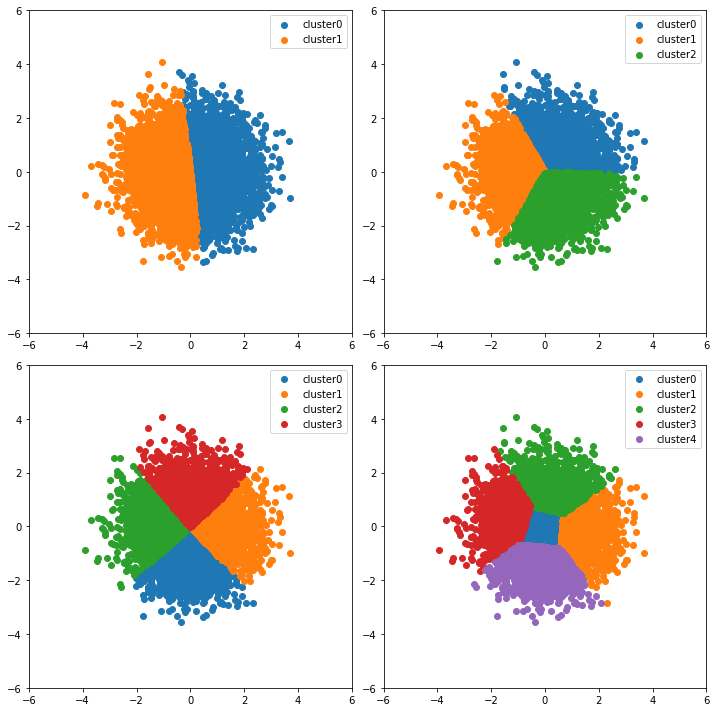

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 10))

d = stats.multivariate_normal(mean=(0,0), cov=[[1,0],[0,1]]).rvs(10000)

cluster_list = [2, 3, 4, 5]
for idx in sp.arange(len(cluster_list)):
    n, cluster_names, c_d = k_means(d, cluster_n=cluster_list[idx])

    # print("c_d: ", c_d[c_d[:,-1]==0][:,0])
    ax = fig.add_subplot(gs[int(idx/2), int(idx%2)])
    for c in cluster_names:
        ax.scatter(c_d[c_d[:,-1]==c][:,0], c_d[c_d[:,-1]==c][:,1], label=f"cluster{c}")

    ax.set_aspect("equal")
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.legend()

plt.tight_layout()
plt.savefig("k-means.png")
plt.show()